In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
k_values = list(range(1, 21))  # Test k values from 1 to 20
accuracies = []

In [23]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')  

Accuracy for k=1: 1.0000
Accuracy for k=2: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=4: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=6: 1.0000
Accuracy for k=7: 0.9667
Accuracy for k=8: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=10: 1.0000
Accuracy for k=11: 1.0000
Accuracy for k=12: 1.0000
Accuracy for k=13: 1.0000
Accuracy for k=14: 1.0000
Accuracy for k=15: 1.0000
Accuracy for k=16: 1.0000
Accuracy for k=17: 1.0000
Accuracy for k=18: 1.0000
Accuracy for k=19: 1.0000
Accuracy for k=20: 1.0000


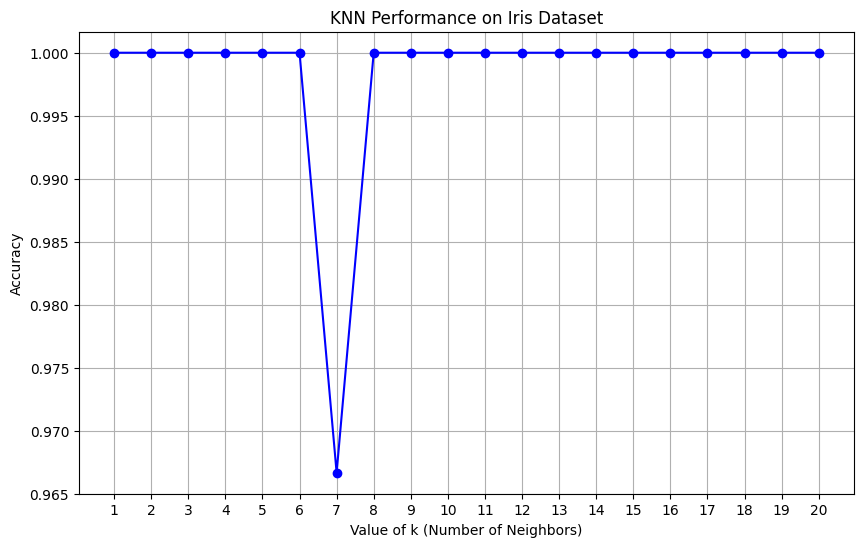

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='b')
plt.title('KNN Performance on Iris Dataset')
plt.xlabel('Value of k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [26]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2)**p)**(1/p)


In [46]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(x1, x2)
        elif self.distance_metric == 'chebyshev':
            return chebyshev_distance(x1, x2)
        elif self.distance_metric == 'minkowski':
            return minkowski_distance(x1, x2)
        else:
            raise ValueError("Invalid distance metric")
    
    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            # Calculate distances from the test point to all training points
            distances = [self._distance(x_test, x_train) for x_train in self.X_train]
            # Get the indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Get the most common class label
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return predictions

In [40]:
iris = load_iris()
X, y = iris.data, iris.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies = []

In [54]:
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} Distance:")
    knn = KNN(k=3, distance_metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)
    print(f"Accuracy with {metric.capitalize()} Distance: {accuracy:.4f}")


Evaluating KNN with Euclidean Distance:
Accuracy with Euclidean Distance: 1.0000

Evaluating KNN with Manhattan Distance:
Accuracy with Manhattan Distance: 1.0000

Evaluating KNN with Chebyshev Distance:
Accuracy with Chebyshev Distance: 1.0000

Evaluating KNN with Minkowski Distance:
Accuracy with Minkowski Distance: 1.0000


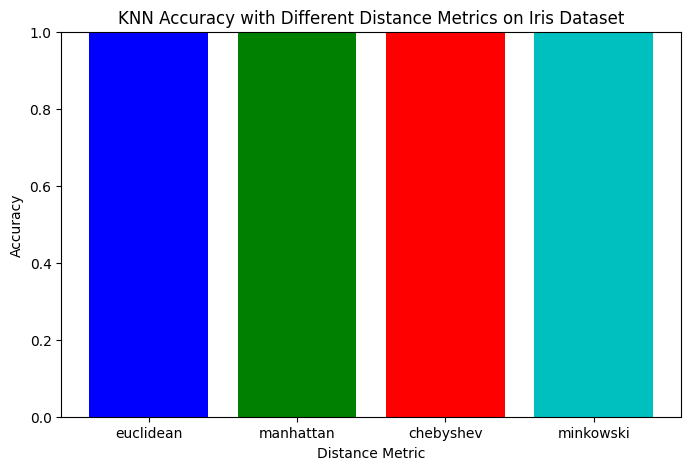

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(distance_metrics, accuracies, color=['b', 'g', 'r', 'c'])
plt.title('KNN Accuracy with Different Distance Metrics on Iris Dataset')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to (0, 1)
plt.show()

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [57]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2)**p)**(1/p)

In [58]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(x1, x2)
        elif self.distance_metric == 'chebyshev':
            return chebyshev_distance(x1, x2)
        elif self.distance_metric == 'minkowski':
            return minkowski_distance(x1, x2)
        else:
            raise ValueError("Invalid distance metric")
    
    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            # Calculate distances from the test point to all training points
            distances = [self._distance(x_test, x_train) for x_train in self.X_train]
            # Get the indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Get the most common class label
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return predictions

In [59]:
df = pd.read_csv('diabetes.csv')

In [60]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies = []

In [63]:
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} Distance on Pima Indians Diabetes Dataset:")
    knn = KNN(k=5, distance_metric=metric)  # Change k as needed
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)
    print(f"Accuracy with {metric.capitalize()} Distance: {accuracy:.4f}")


Evaluating KNN with Euclidean Distance on Pima Indians Diabetes Dataset:
Accuracy with Euclidean Distance: 0.6623

Evaluating KNN with Manhattan Distance on Pima Indians Diabetes Dataset:
Accuracy with Manhattan Distance: 0.6688

Evaluating KNN with Chebyshev Distance on Pima Indians Diabetes Dataset:
Accuracy with Chebyshev Distance: 0.7078

Evaluating KNN with Minkowski Distance on Pima Indians Diabetes Dataset:
Accuracy with Minkowski Distance: 0.7013


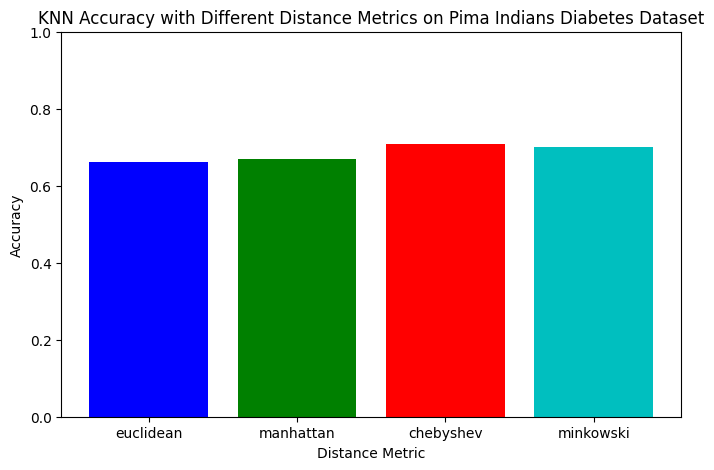

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(distance_metrics, accuracies, color=['b', 'g', 'r', 'c'])
plt.title('KNN Accuracy with Different Distance Metrics on Pima Indians Diabetes Dataset')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to (0, 1)
plt.show()